# Delaunay Triangulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

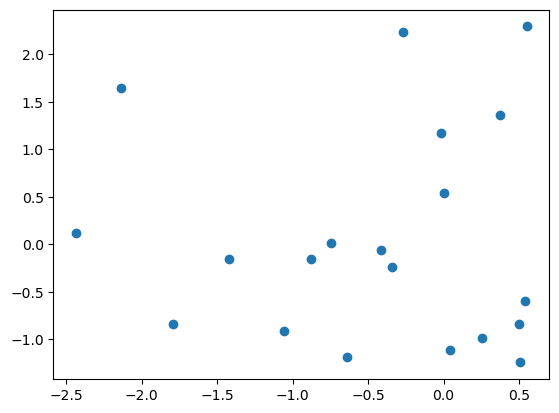

In [2]:
np.random.seed(2)
n_points = 20
X = np.random.randn(n_points, 2)
plt.scatter(X[:, 0], X[:, 1])

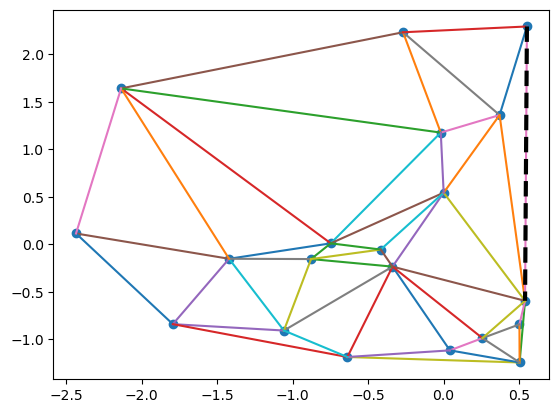

In [3]:
def tris2edges(tris):
    edges = set([])
    for tri in tris:
        for k in range(3):
            i, j = tri[k], tri[(k+1)%3]
            i, j = min(i, j), max(i, j)
            edges.add((i, j))
    return np.array(list(edges), dtype=int)
        

tri = Delaunay(X)
edges = tris2edges(tri.simplices)
plt.scatter(X[:, 0], X[:, 1])
for [i, j] in edges:
    xi = X[i]
    xj = X[j]
    plt.plot([xi[0], xj[0]], [xi[1], xj[1]])
    
# Euclidean distances in an array parallel to the edges
distances = []
for [i, j] in edges:
    xi = X[i]
    xj = X[j]
    d = ((xi[0]-xj[0])**2 + (xi[1]-xj[1])**2)**0.5
    distances.append(d)
# Longest edge
idx = np.argmax(distances)
xi = X[edges[idx][0]]
xj = X[edges[idx][1]]
plt.plot([xi[0], xj[0]], [xi[1], xj[1]], linestyle='--', linewidth=3, c='k')